## MATF85 - Mineração de Dados (2021.2) 
### Discente: Laila Pereira Mota Santos
### Discente: Gabriel Chaves Brito

Dataset: [Link do Kaggle](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min)


#### Informações sobre o Dataset

* `gameId` - Identificador da partida
* `blueWins` - Indica se o time azul ganhou ou perdeu (0 ou 1) 
* `blueWardsPlaced` - Qt. de wards posicionadas do time azul
* `blueWardsDestroyed` - Qt. de wards removidas pelo time azul
* `blueFirstBlood` - Indica se na partida houve first blood (0 ou 1) do time azul
* `blueKills` - Qt. abates do time azul
* `blueDeaths` - Qt. mortes do time azul
* `blueAssists` - Qt. de assistências em abates do time azul
* `blueEliteMonsters` - Qt. de monstros grandes abatidos pelo time azul (Dragons and Heralds. Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team)
* `blueDragons` - Qt. de Dragões abatidos pelo time azul (Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team)
* `blueHeralds` - Qt. de Arautos abatidos pelo time azul (Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures)
* `blueTowersDestroyed` - Qt. de torres destruidas pelo time azul (Structures you have to destroy to reach the enemy Nexus. They give gold)
* `blueTotalGold` - Qt. total de gold acumulado pelo time azul
* `blueAvgLevel` - Média do nível do time azul (Champion level. Start at 1. Max is 18. Blue team average champion level)
* `blueTotalExperience` - Somatório da experiência adquirida do time azul
* `blueTotalMinionsKilled` - Qt. de minions abatidos pelo time azul
* `blueTotalJungleMinionsKilled` - Qt. monstros da selva abatidos
* `blueGoldDiff` - Diferença de ouro entre os times
* `blueExperienceDiff` - Diferença de experiência entre os times
* `blueCSPerMin` - Contagem de minions abatidos por minuto do time azul
* `blueGoldPerMin` - Contagem de ouro por minuto do time azul
* `redWardsPlaced` - Qt. de wards posicionadas do time vermelho
* `redWardsDestroyed` - Qt. de wards removidas pelo time vermelho
* `redFirstBlood` - Indica se na partida houve first blood (0 ou 1) do time vermelho
* `redKills` - Qt. abates do time vermelho
* `redDeaths` - Qt. mortes do time vermelho
* `redAssists` - Qt. de assistências em abates do time vermelho
* `redEliteMonsters` - Qt. de monstros grandes abatidos pelo time vermelho (Dragons and Heralds. Monsters with high hp/damage that give a massive bonus (gold/XP/stats) when killed by a team)
* `redDragons` - Qt. de Dragões abatidos pelo time vermelho (Elite monster which gives team bonus when killed. The 4th dragon killed by a team gives a massive stats bonus. The 5th dragon (Elder Dragon) offers a huge advantage to the team)
* `redHeralds` - Qt. de Arautos abatidos pelo time vermelho (Elite monster which gives stats bonus when killed by the player. It helps to push a lane and destroys structures)
* `redTowersDestroyed` - Qt. de torres destruidas pelo time vermelho (Structures you have to destroy to reach the enemy Nexus. They give gold)
* `redTotalGold` - Qt. total de gold acumulado pelo time vermelho
* `redAvgLevel` - Média do nível do time vermelho (Champion level. Start at 1. Max is 18. Red team average champion level)
* `redTotalExperience` - Somatório da experiência adquirida do time vermelho
* `redTotalMinionsKilled` - Qt. de minions abatidos pelo time vermelho
* `redTotalJungleMinionsKilled` - Qt. monstros da selva abatidos
* `redGoldDiff` - Diferença de ouro entre os times
* `redExperienceDiff` - Diferença de experiência entre os times
* `redCSPerMin` - Contagem de minions abatidos por minuto do time vermelho
* `redGoldPerMin` - Contagem de ouro por minuto do time vermelho

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Definição de funções

In [23]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.scatter(ind, vals)
    ax.plot(ind, vals, color='r')
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

# Atividade 1

## Inicialização

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

ranked = pd.read_csv('/content/drive/Shareddrives/Mineração-ufba/high_diamond_ranked_10min.csv')
ranked = ranked.drop('gameId', axis=1)
ranked_copy = ranked.copy()
ranked_copy['winner'] = ranked_copy['blueWins'].map({0: 'red', 1: 'blue'}) # adiciona a coluna com a cor do vencedor

In [25]:
ranked_copy.head(10)

blueWins  blueWardsPlaced  ...  redGoldPerMin  winner
0         0               28  ...         1656.7     red
1         0               12  ...         1762.0     red
2         0               15  ...         1728.5     red
3         0               43  ...         1647.8     red
4         0               75  ...         1740.4     red
5         1               18  ...         1520.1    blue
6         1               18  ...         1446.3    blue
7         0               16  ...         1792.0     red
8         0               16  ...         1838.0     red
9         1               13  ...         1660.5    blue

[10 rows x 40 columns]

In [26]:
ranked.shape

(9879, 39)

In [27]:
ranked.head()

blueWins  blueWardsPlaced  ...  redCSPerMin  redGoldPerMin
0         0               28  ...         19.7         1656.7
1         0               12  ...         24.0         1762.0
2         0               15  ...         20.3         1728.5
3         0               43  ...         23.5         1647.8
4         0               75  ...         22.5         1740.4

[5 rows x 39 columns]

In [28]:
ranked.describe()

blueWins  blueWardsPlaced  ...  redCSPerMin  redGoldPerMin
count  9879.000000      9879.000000  ...  9879.000000    9879.000000
mean      0.499038        22.288288  ...    21.734923    1648.904140
std       0.500024        18.019177  ...     2.191167     149.088841
min       0.000000         5.000000  ...    10.700000    1121.200000
25%       0.000000        14.000000  ...    20.300000    1542.750000
50%       0.000000        16.000000  ...    21.800000    1637.800000
75%       1.000000        20.000000  ...    23.300000    1741.850000
max       1.000000       250.000000  ...    28.900000    2273.200000

[8 rows x 39 columns]

In [29]:
tabela = pd.crosstab(ranked['blueWins'], ranked['blueKills'])

In [30]:
tabela

blueKills  0    1    2    3    4    5    6   ...  14  15  16  17  18  19  22
blueWins                                     ...                            
0          54  253  460  662  703  752  647  ...  10   6   1   0   0   0   0
1           9   60  149  255  483  550  675  ...  54  32  29  13   4   2   1

[2 rows x 21 columns]

## Gráficos com Plotly

In [31]:
boxplot_blue_fb_kills = px.box( ranked, 
                               x='blueFirstBlood', 
                               y='blueKills', 
                               width=600, 
                               height=400
                               )
boxplot_blue_fb_kills.show()

In [32]:
boxplot_red_fb_kills = px.box(ranked, 
                              x='redFirstBlood', 
                              y='redKills', 
                              color_discrete_sequence=['#EF553B'], 
                              width=600, 
                              height=400                              
                              )
boxplot_red_fb_kills.show()

In [33]:
boxplot_blue_win_kills =px.box(ranked_copy, 
                               x='winner', 
                               y='blueKills', 
                               width=600, 
                               height=400 
                               )
boxplot_blue_win_kills.update_layout(showlegend=False)
boxplot_blue_win_kills.show()


In [34]:
ranked['blueKills'].describe()

count    9879.000000
mean        6.183925
std         3.011028
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        22.000000
Name: blueKills, dtype: float64

In [35]:
hist_blue_kills = px.histogram(ranked, 
                               x='blueKills', 
                               width=600, 
                               height=400
                               )
hist_blue_kills.show()

In [36]:
ranked['redKills'].describe()

count    9879.000000
mean        6.137666
std         2.933818
min         0.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        22.000000
Name: redKills, dtype: float64

In [37]:
hist_red_kills = px.histogram(ranked, 
                              x='redKills', 
                              color_discrete_sequence=['#EF553B'], 
                              width=600, 
                              height=400
                              )
hist_red_kills.show()

In [38]:
ranked['blueWardsPlaced'].describe()

count    9879.000000
mean       22.288288
std        18.019177
min         5.000000
25%        14.000000
50%        16.000000
75%        20.000000
max       250.000000
Name: blueWardsPlaced, dtype: float64

In [39]:
hist_blue_wards = px.histogram(ranked, 
                               x='blueWardsPlaced', 
                               width=800, 
                               height=400
                               )
hist_blue_wards.show()

In [40]:
ranked['redWardsPlaced'].describe()

count    9879.000000
mean       22.367952
std        18.457427
min         6.000000
25%        14.000000
50%        16.000000
75%        20.000000
max       276.000000
Name: redWardsPlaced, dtype: float64

In [41]:
hist_red_wards = px.histogram(ranked, 
                              x='redWardsPlaced', 
                              color_discrete_sequence=['#EF553B'], 
                              width=800, 
                              height=400
                              )
hist_red_wards.show()

In [42]:
scat_blue_gold_minions = px.scatter(ranked, 
                                    x='blueTotalGold', 
                                    y='blueTotalMinionsKilled', 
                                    width=800, 
                                    height=500
                                    )
scat_blue_gold_minions.show()

In [43]:
scat_red_gold_minions = px.scatter(ranked,
                                   x='redTotalGold', 
                                   y='redTotalMinionsKilled', 
                                   color_discrete_sequence=['#EF553B'], 
                                   width=800, 
                                   height=500
                                   )
scat_red_gold_minions.show()

In [44]:
scat_blue_xp_minions = px.scatter(ranked, 
                                  x='blueTotalMinionsKilled', 
                                  y='blueTotalExperience', 
                                  width=800, 
                                  height=500
                                  )
scat_blue_xp_minions.show()

In [45]:
scat_red_xp_minions = px.scatter(ranked, 
                                 x='redTotalMinionsKilled', 
                                 y='redTotalExperience', 
                                 color_discrete_sequence=['#EF553B'], 
                                 width=800, 
                                 height=500
                                 )
scat_red_xp_minions.show()

In [46]:
scat_xp_wins = px.scatter(ranked_copy, 
                          x='blueTotalExperience', 
                          y='redTotalExperience', 
                          color='winner', 
                          color_discrete_map={ 
                              "red": '#EF553B', 
                              "blue": '#636EFA' 
                              }, 
                          width=800, 
                          height=500
                          )
scat_xp_wins.show()

## Gráficos com seaborn

In [47]:
sns.set_color_codes(palette='muted')

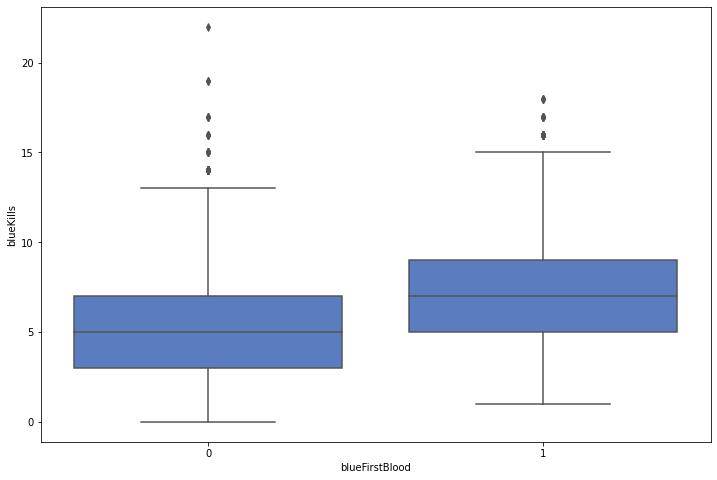

In [48]:
plt.figure(figsize=(12,8))
sns.boxplot(x='blueFirstBlood',y='blueKills', data=ranked, color='b')
plt.show()

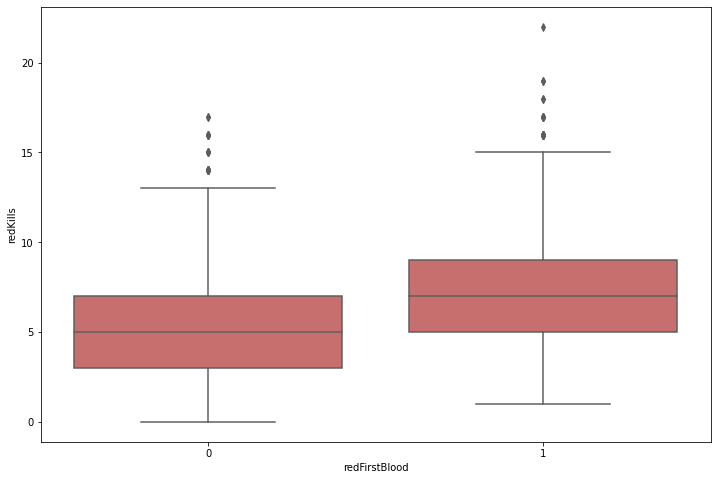

In [49]:
plt.figure(figsize=(12,8))
sns.boxplot(x='redFirstBlood',y='redKills', data=ranked, color='r')
plt.show()

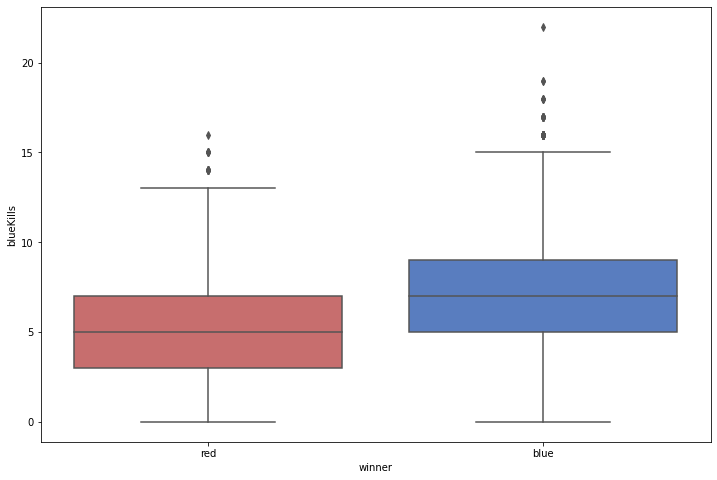

In [50]:
# Aqui foi usado o ranked-copy apenas pra separar as cores dos times
plt.figure(figsize=(12,8))
my_pal = {"red": "r", "blue": "b"}
sns.boxplot(x='winner',y='blueKills', data=ranked_copy, palette=my_pal)
plt.show()

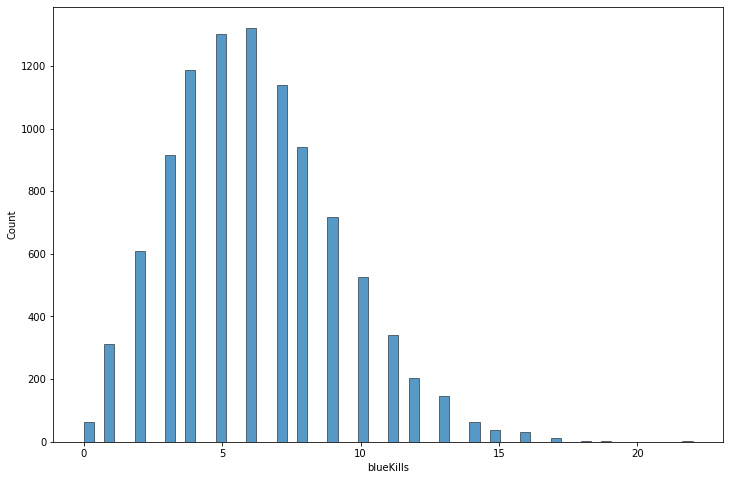

In [51]:
plt.figure(figsize=(12,8))
sns.histplot(
    ranked,
    x="blueKills",
    linewidth=.5
)
plt.show()

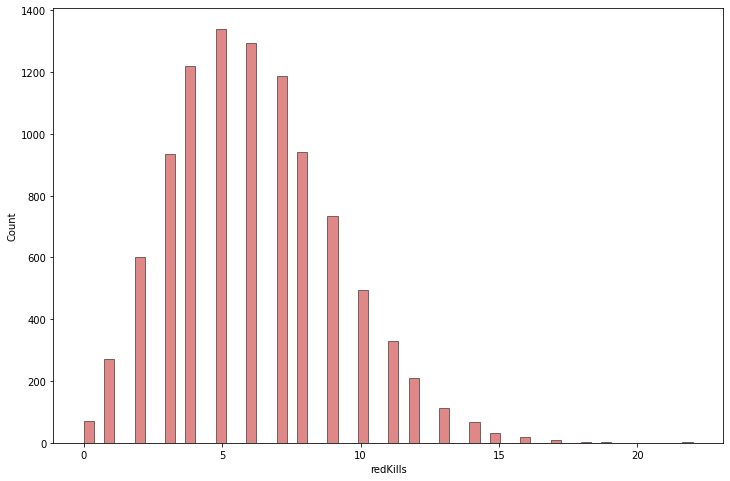

In [52]:
plt.figure(figsize=(12,8))
sns.histplot(
    ranked,
    x="redKills",
    linewidth=.5, color='r'
)
plt.show()

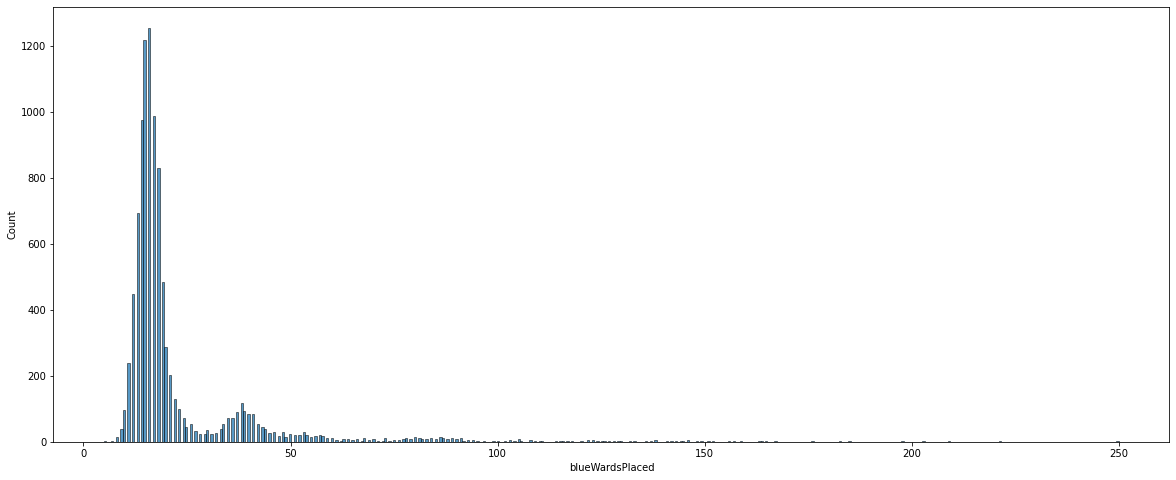

In [53]:
plt.figure(figsize=(20,8))
sns.histplot(
    ranked,
    x="blueWardsPlaced",
    linewidth=.5
)
plt.show()

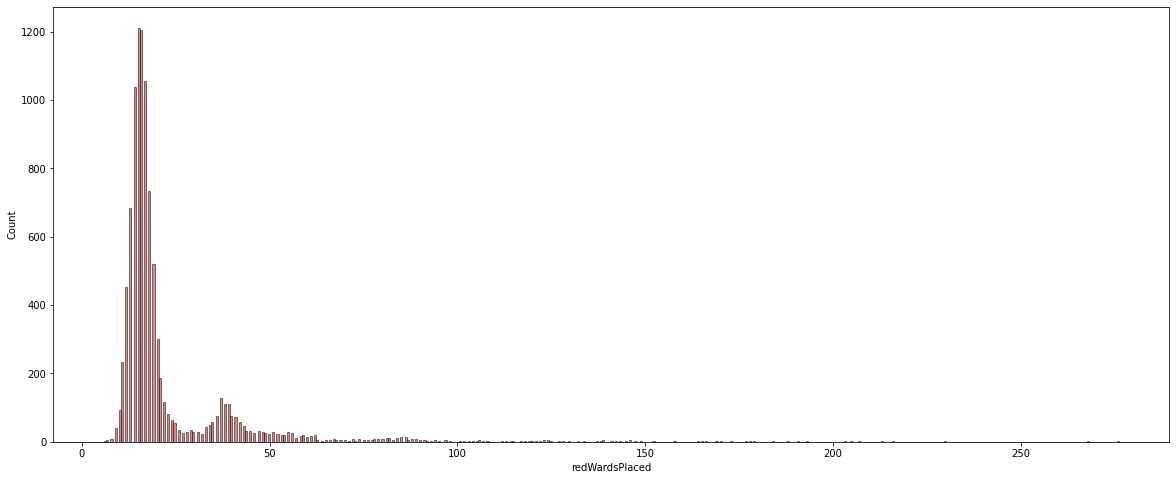

In [54]:
plt.figure(figsize=(20,8))
sns.histplot(
    ranked,
    x="redWardsPlaced",
    linewidth=.5,
    color='r'
)
plt.show()

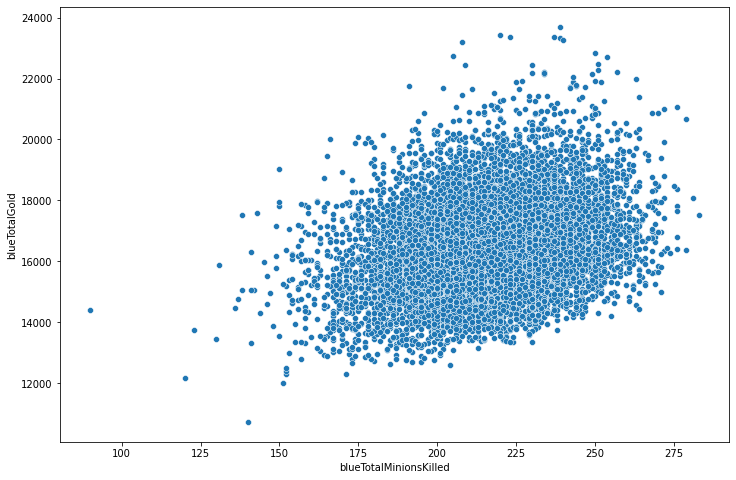

In [55]:
plt.figure(figsize=(12,8))
sns.scatterplot(y="blueTotalGold", x="blueTotalMinionsKilled",
                linewidth=.5,
                data=ranked)
plt.show()

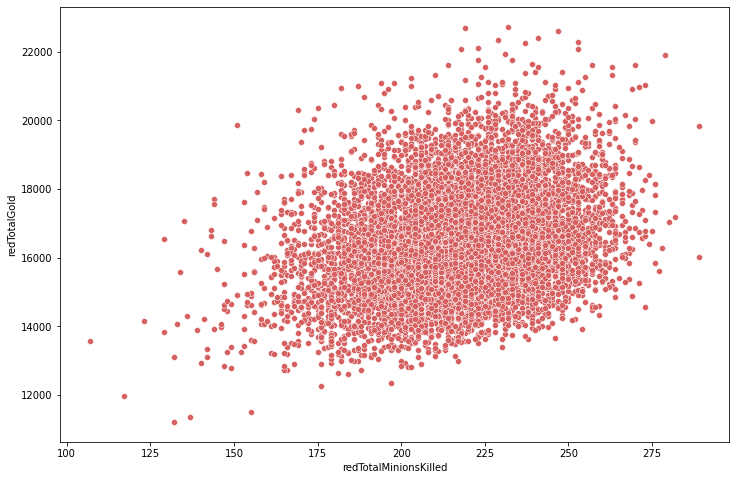

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(y="redTotalGold", x="redTotalMinionsKilled",
                linewidth=.5,
                data=ranked,
                color='r')
plt.show()

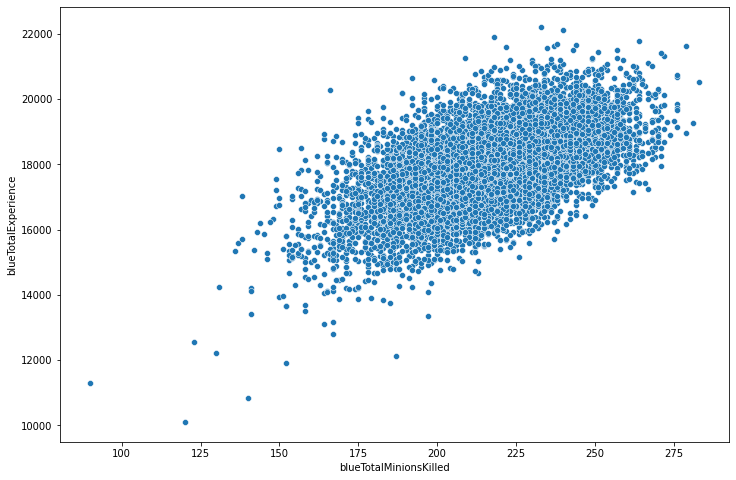

In [57]:
plt.figure(figsize=(12,8))
sns.scatterplot(y="blueTotalExperience", x="blueTotalMinionsKilled",
                linewidth=.5,
                data=ranked)
plt.show()

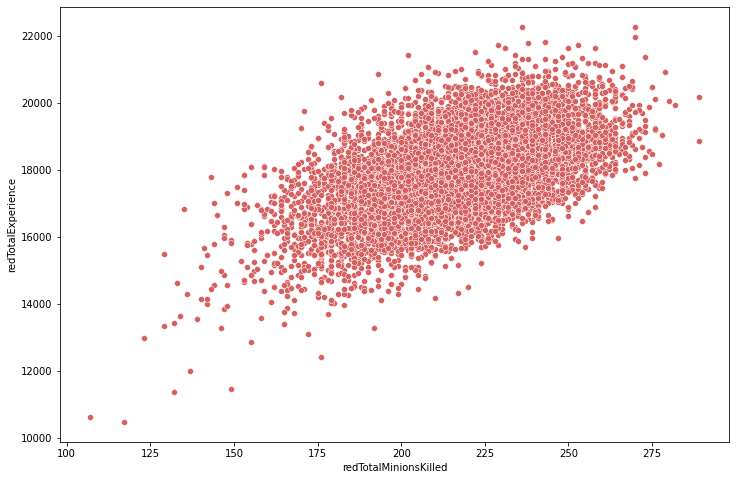

In [58]:
plt.figure(figsize=(12,8))
sns.scatterplot(y="redTotalExperience", x="redTotalMinionsKilled",
                linewidth=.5,
                data=ranked,
                color='r')
plt.show()

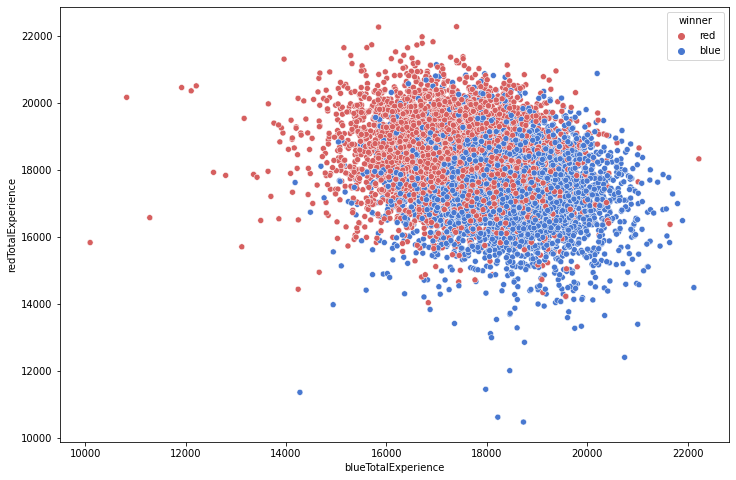

In [59]:
# Aqui foi usado ranked_copy apenas pra separar as cores e pra legenda
plt.figure(figsize=(12,8))
my_pal = {"red": "r", "blue": "b"}
sns.scatterplot(x="blueTotalExperience", y="redTotalExperience",
                linewidth=.5,
                data=ranked_copy, hue='winner',palette=my_pal)
plt.show()

#Atividade 2

In [60]:
ranked.shape

(9879, 39)

In [61]:
ranked.head(10)

blueWins  blueWardsPlaced  ...  redCSPerMin  redGoldPerMin
0         0               28  ...         19.7         1656.7
1         0               12  ...         24.0         1762.0
2         0               15  ...         20.3         1728.5
3         0               43  ...         23.5         1647.8
4         0               75  ...         22.5         1740.4
5         1               18  ...         22.1         1520.1
6         1               18  ...         16.4         1446.3
7         0               16  ...         15.7         1792.0
8         0               16  ...         24.0         1838.0
9         1               13  ...         24.7         1660.5

[10 rows x 39 columns]

In [62]:
ranked_columns = ranked.describe().columns
ranked_columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [63]:
# Nossa base de dados não possui valores nulos (NaN)
ranked[pd.isnull(ranked).any(axis=1)].head()

Empty DataFrame
Columns: [blueWins, blueWardsPlaced, blueWardsDestroyed, blueFirstBlood, blueKills, blueDeaths, blueAssists, blueEliteMonsters, blueDragons, blueHeralds, blueTowersDestroyed, blueTotalGold, blueAvgLevel, blueTotalExperience, blueTotalMinionsKilled, blueTotalJungleMinionsKilled, blueGoldDiff, blueExperienceDiff, blueCSPerMin, blueGoldPerMin, redWardsPlaced, redWardsDestroyed, redFirstBlood, redKills, redDeaths, redAssists, redEliteMonsters, redDragons, redHeralds, redTowersDestroyed, redTotalGold, redAvgLevel, redTotalExperience, redTotalMinionsKilled, redTotalJungleMinionsKilled, redGoldDiff, redExperienceDiff, redCSPerMin, redGoldPerMin]
Index: []

In [64]:
# Informações que mostram que nossa base não possui valores nulos
ranked.info()
pd.options.display.max_columns=None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [65]:
features_blueTeam = ['blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin']
#ranked[features_blueTeam].head()

In [66]:
features_redTeam = ['redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']
#ranked[features_redTeam].head()

In [67]:
# Separa o dataset do time Azul
blueTeam = ranked[features_blueTeam]
blueTeam.head()

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  \
0               28                   2               1          9           6   
1               12                   1               0          5           5   
2               15                   0               0          7          11   
3               43                   1               0          4           5   
4               75                   4               0          6           6   

   blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           11                  0            0            0   
1            5                  0            0            0   
2            4                  1            1            0   
3            5                  1            0            1   
4            6                  0            0            0   

   blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                    0          17210           6.6                17039   
1                    0          14712           6.6                16265   
2                    0          16113           6.4                16221   
3                    0          15157           7.0                17954   
4                    0          16400           7.0                18543   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   
2                     186                            46         -1172   
3                     201                            55         -1321   
4                     210                            57         -1004   

   blueExperienceDiff  blueCSPerMin  blueGoldPerMin  
0                  -8          19.5          1721.0  
1               -1173          17.4          1471.2  
2               -1033          18.6          1611.3  
3                  -7          20.1          1515.7  
4                 230          21.0          1640.0

In [68]:
# Separa o dataset do time Vermelho
redTeam = ranked[features_redTeam]
redTeam.head()

redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  \
0              15                  6              0         6          9   
1              12                  1              1         5          5   
2              15                  3              1        11          7   
3              15                  2              1         5          4   
4              17                  2              1         6          6   

   redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  \
0           8                 0           0           0                   0   
1           2                 2           1           1                   1   
2          14                 0           0           0                   0   
3          10                 0           0           0                   0   
4           7                 1           1           0                   0   

   redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0         16567          6.8               17047                    197   
1         17620          6.8               17438                    240   
2         17285          6.8               17254                    203   
3         16478          7.0               17961                    235   
4         17404          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4                           67         1004               -230         22.5   

   redGoldPerMin  
0         1656.7  
1         1762.0  
2         1728.5  
3         1647.8  
4         1740.4

In [69]:
X = ranked.drop('blueWins', axis=1)
Y = ranked['blueWins']

In [70]:
X.head()

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  \
0               28                   2               1          9           6   
1               12                   1               0          5           5   
2               15                   0               0          7          11   
3               43                   1               0          4           5   
4               75                   4               0          6           6   

   blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           11                  0            0            0   
1            5                  0            0            0   
2            4                  1            1            0   
3            5                  1            0            1   
4            6                  0            0            0   

   blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                    0          17210           6.6                17039   
1                    0          14712           6.6                16265   
2                    0          16113           6.4                16221   
3                    0          15157           7.0                17954   
4                    0          16400           7.0                18543   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   
2                     186                            46         -1172   
3                     201                            55         -1321   
4                     210                            57         -1004   

   blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  \
0                  -8          19.5          1721.0              15   
1               -1173          17.4          1471.2              12   
2               -1033          18.6          1611.3              15   
3                  -7          20.1          1515.7              15   
4                 230          21.0          1640.0              17   

   redWardsDestroyed  redFirstBlood  redKills  redDeaths  redAssists  \
0                  6              0         6          9           8   
1                  1              1         5          5           2   
2                  3              1        11          7          14   
3                  2              1         5          4          10   
4                  2              1         6          6           7   

   redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  redTotalGold  \
0                 0           0           0                   0         16567   
1                 2           1           1                   1         17620   
2                 0           0           0                   0         17285   
3                 0           0           0                   0         16478   
4                 1           1           0                   0         17404   

   redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0          6.8               17047                    197   
1          6.8               17438                    240   
2          6.8               17254                    203   
3          7.0               17961                    235   
4          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4                           67         1004               -230         22.5   

   redGoldPerMin  
0         1656.7  
1         1762

##Analisando os dados

In [71]:
# Unique values
ranked['blueAvgLevel'].unique()

array([6.6, 6.4, 7. , 6.8, 7.2, 7.4, 7.6, 6.2, 7.8, 5.8, 6. , 8. , 5.4,
       5.6, 5.2, 4.8, 4.6])

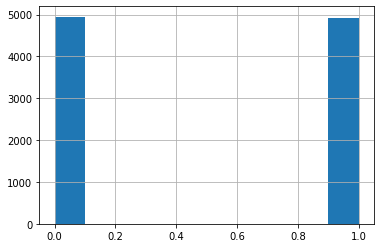

In [72]:
ranked['blueWins'].hist()

In [73]:
ranked['redAvgLevel'].unique()

array([6.8, 7. , 6.4, 6.6, 7.2, 7.4, 6.2, 7.6, 7.8, 5.8, 6. , 5.4, 4.8,
       5.6, 8. , 5. , 8.2, 5.2])

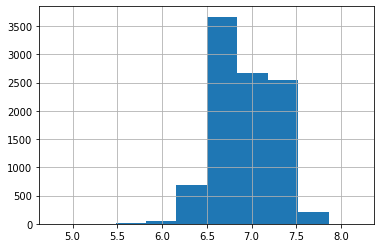

In [74]:
ranked['redAvgLevel'].hist()

In [75]:
# Grouping
winner_group = ranked.groupby('blueWins')
winner_group.mean()

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
blueWins                                                                   
0               22.286725            2.728834        0.404122   5.170135   
1               22.289858            2.921298        0.605882   7.201623   

          blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
blueWins                                                            
0           7.131138     5.522732           0.411396     0.259446   
1           5.140365     7.771805           0.689047     0.464909   

          blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
blueWins                                                                  
0            0.151950             0.023237   15864.111134      6.807032   
1            0.224138             0.079716   17145.263895      7.025396   

          blueTotalExperience  blueTotalMinionsKilled  \
blueWins                                                
0                 17453.47161              211.793090   
1                 18404.57789              221.624949   

          blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
blueWins                                                                   
0                            49.211154  -1237.066680         -971.898969   
1                            51.813185   1270.718053          908.274442   

          blueCSPerMin  blueGoldPerMin  redWardsPlaced  redWardsDestroyed  \
blueWins                                                                    
0            21.179309     1586.411113       22.804001           2.841382   
1            22.162495     1714.526389       21.930223           2.604462   

          redFirstBlood  redKills  redDeaths  redAssists  redEliteMonsters  \
blueWins                                                                     
0              0.595878  7.131138   5.170135    7.760558          0.711659   
1              0.394118  5.140365   7.201623    5.559432          0.434077   

          redDragons  redHeralds  redTowersDestroyed  redTotalGold  \
blueWins                                                             
0           0.516064    0.195595            0.065468  17101.177814   
1           0.309736    0.124341            0.020487  15874.545842   

          redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
blueWins                                                           
0            7.032613        18425.370580             221.989089   
1            6.817606        17496.303448             212.691481   

          redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  \
blueWins                                                                
0                           52.423924  1237.066680         971.898969   
1                           50.197972 -1270.718053        -908.274442   

          redCSPerMin  redGoldPerMin  
blueWins                              
0           22.198909    1710.117781  
1           21.269148    1587.454584

##Mapa de Calor entre os atributos

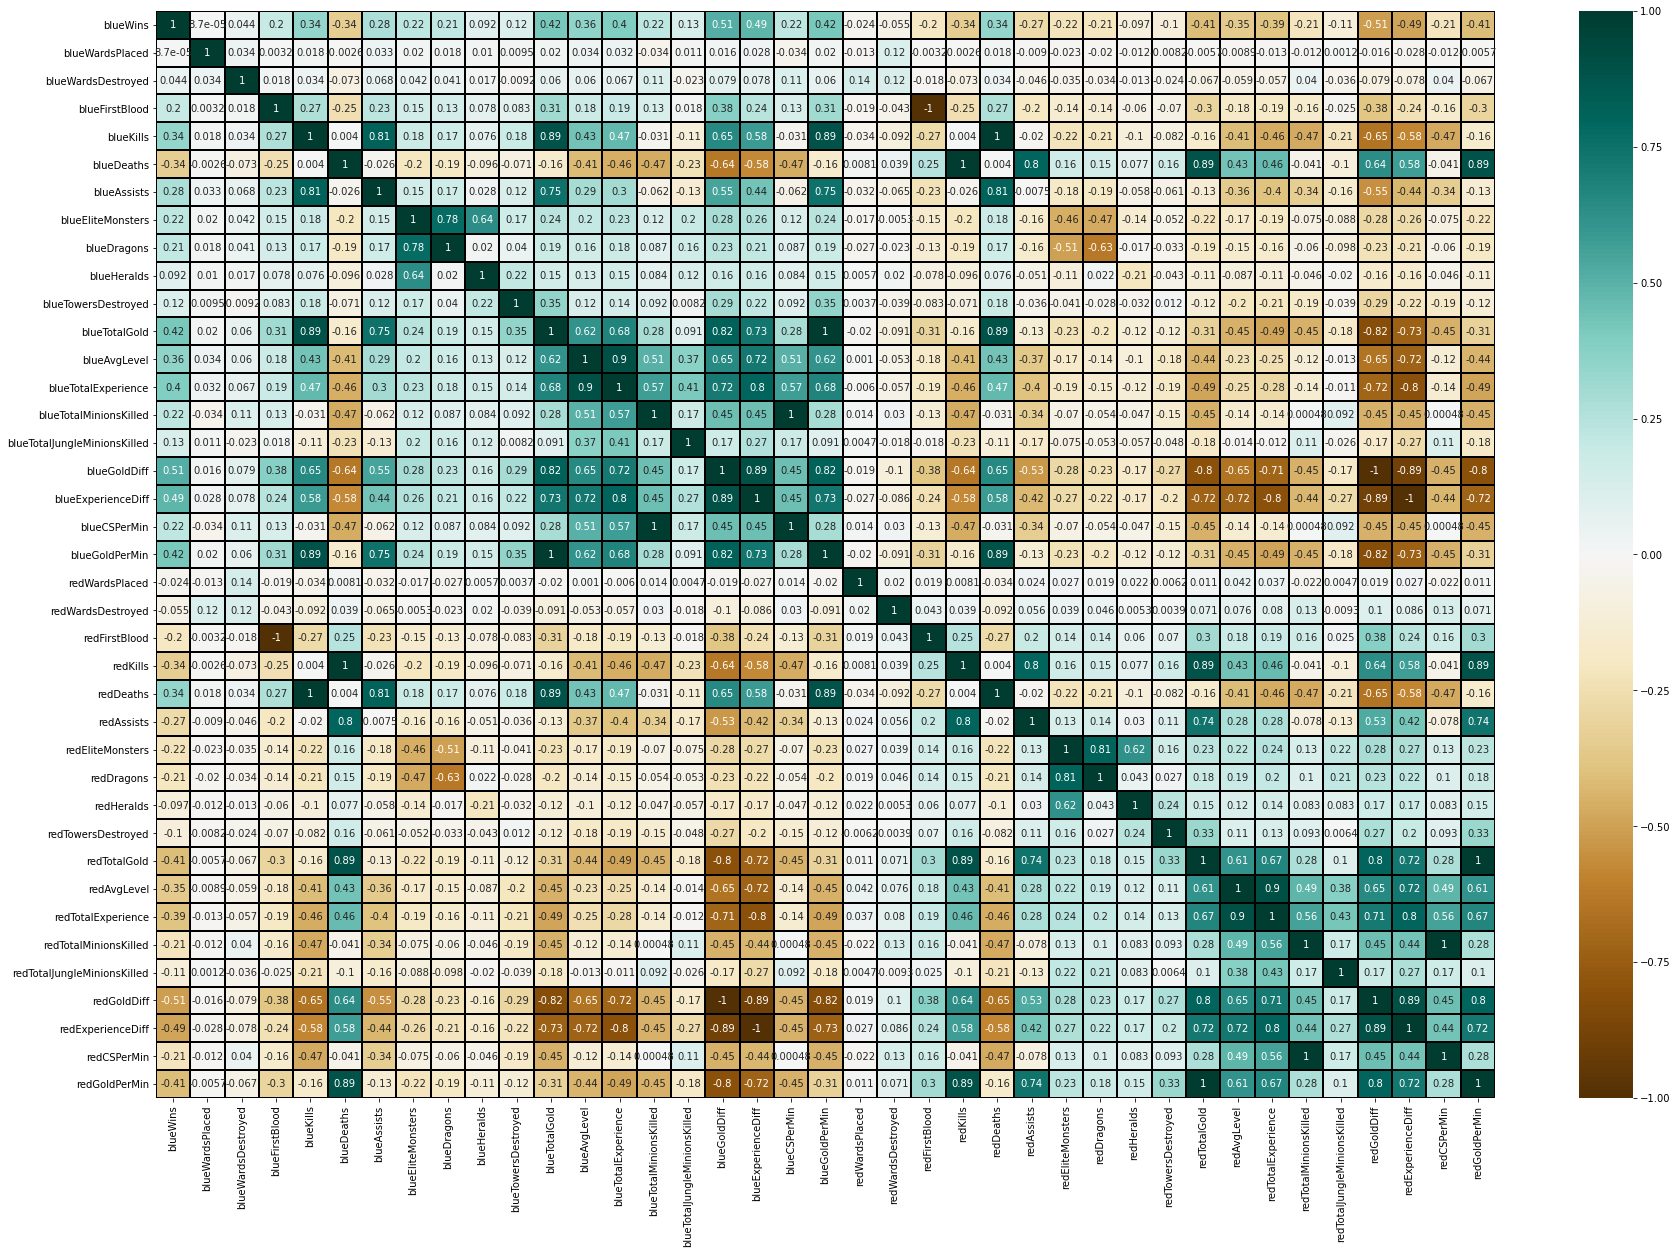

In [76]:
# Mapa de Calor
plt.figure(figsize=(30, 20))
sns.heatmap(ranked.corr(), 
           xticklabels=ranked.corr().columns.values,
           yticklabels=ranked.corr().columns.values,
           vmin=-1, vmax=1, center= 0, cmap='BrBG', annot = True,
           linewidths=1, linecolor='black'          
           )

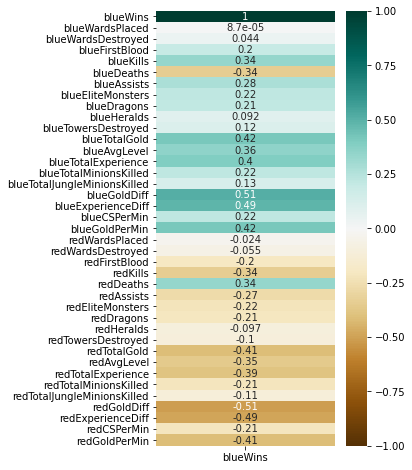

In [77]:
# Correlação com a vitória
fig = plt.figure(figsize=(4, 8))
sns.heatmap(ranked.corr()[['blueWins']],vmin=-1, vmax=1, center= 0, cmap='BrBG', annot=True)

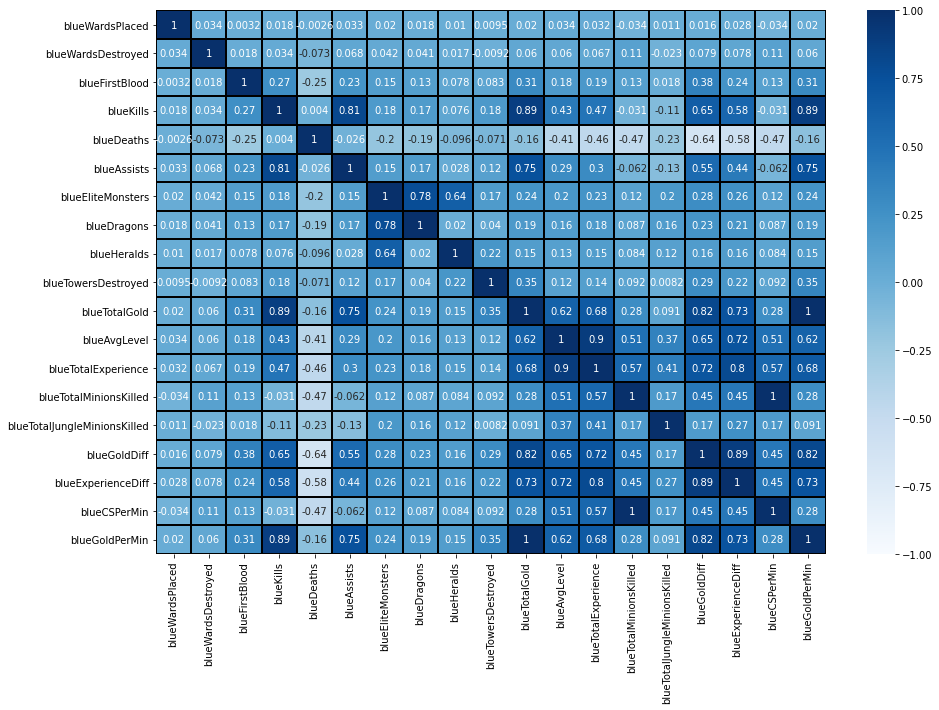

In [78]:
#Mapa de calor do time azul
plt.figure(figsize=(15, 10))
sns.heatmap(blueTeam.corr(), 
           xticklabels=blueTeam.corr().columns.values,
           yticklabels=blueTeam.corr().columns.values,
           vmin=-1, vmax=1, center= 0, cmap='Blues', annot = True,
           linewidths=1, linecolor='black'          
           )

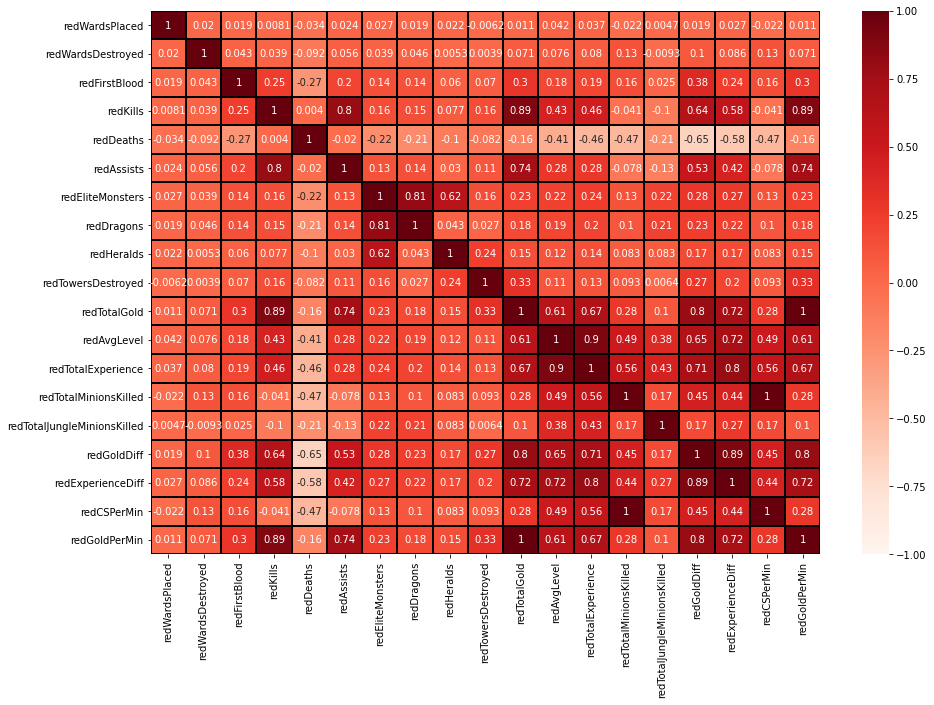

In [79]:
#Mapa de calor do time vermelho
plt.figure(figsize=(15, 10))
sns.heatmap(redTeam.corr(), 
           xticklabels=redTeam.corr().columns.values,
           yticklabels=redTeam.corr().columns.values,
           vmin=-1, vmax=1, center= 0, cmap='Reds', annot = True,
           linewidths=1, linecolor='black'          
           )

##Matriz de Correlação

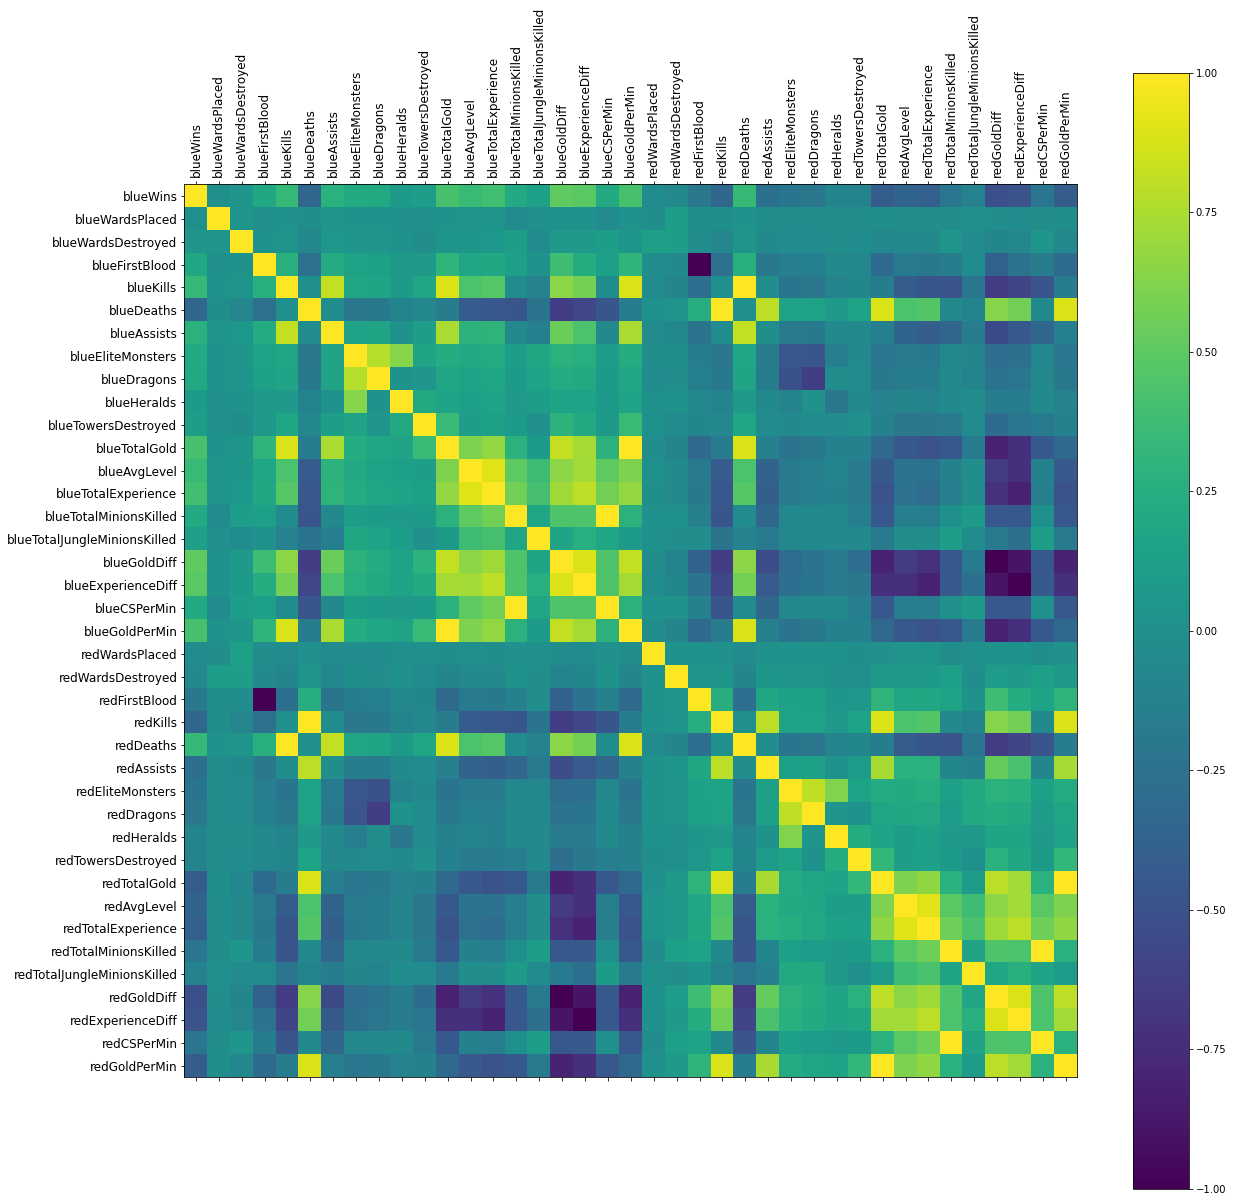

In [80]:
#Matriz de correlação
f = plt.figure(figsize=(20, 20))
plt.matshow(ranked.corr(),fignum=f.number)
continuous_features = ranked.describe().columns
plt.xticks(range(ranked.select_dtypes(['number']).shape[1]), ranked.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(ranked.select_dtypes(['number']).shape[1]), ranked.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()


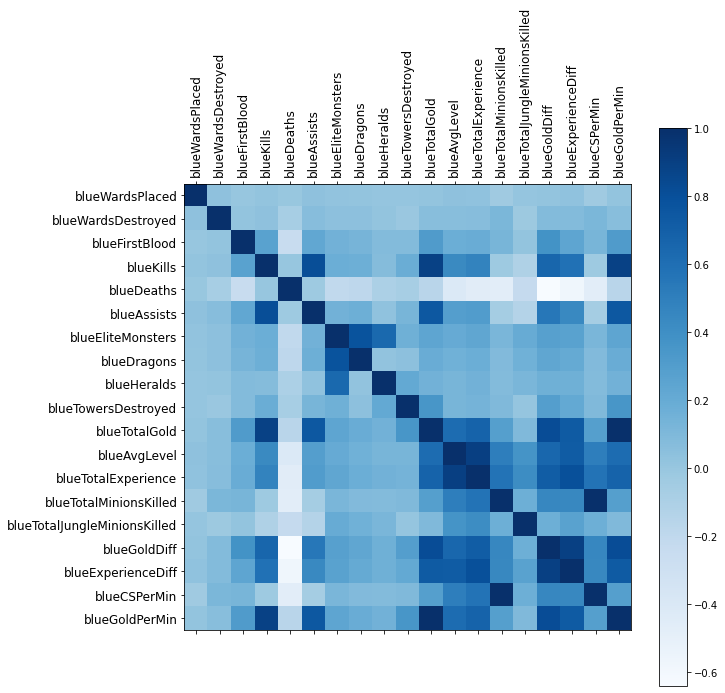

In [81]:
#Matriz de correlação do time azul
f = plt.figure(figsize=(10, 10))
plt.matshow(blueTeam.corr(),fignum=f.number, cmap='Blues')
continuous_features = blueTeam.describe().columns
plt.xticks(range(blueTeam.select_dtypes(['number']).shape[1]), blueTeam.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(blueTeam.select_dtypes(['number']).shape[1]), blueTeam.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()

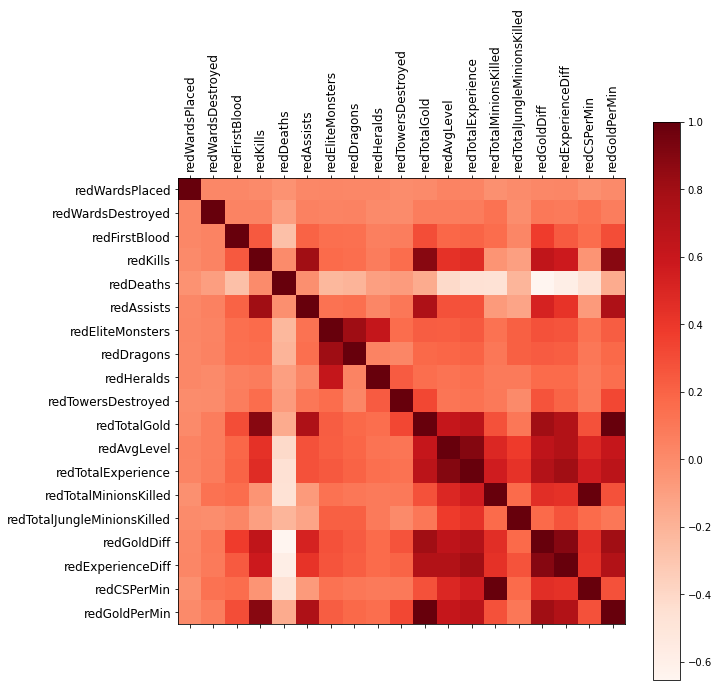

In [82]:
#Matris de correlação do time vermelho
f = plt.figure(figsize=(10, 10))
plt.matshow(redTeam.corr(),fignum=f.number, cmap='Reds')
continuous_features = redTeam.describe().columns
plt.xticks(range(redTeam.select_dtypes(['number']).shape[1]), redTeam.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(redTeam.select_dtypes(['number']).shape[1]), redTeam.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()

##Salvando em CSV

In [83]:
# Saving dataframe to CSV
ranked.to_csv('preprocessed_ranked.csv', index=False)

#Atividade 3

In [84]:
X_ranked = ranked[ranked_columns]
X_ranked.head(15)

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0          0               28                   2               1          9   
1          0               12                   1               0          5   
2          0               15                   0               0          7   
3          0               43                   1               0          4   
4          0               75                   4               0          6   
5          1               18                   0               0          5   
6          1               18                   3               1          7   
7          0               16                   2               0          5   
8          0               16                   3               0          7   
9          1               13                   1               1          4   
10         0               20                   3               1          4   
11         0               33                   2               1         11   
12         1               18                   1               1          7   
13         0               14                   3               0          4   
14         1               15                   3               1          4   

    blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0            6           11                  0            0            0   
1            5            5                  0            0            0   
2           11            4                  1            1            0   
3            5            5                  1            0            1   
4            6            6                  0            0            0   
5            3            6                  1            1            0   
6            6            7                  1            1            0   
7           13            3                  0            0            0   
8            7            8                  0            0            0   
9            5            5                  1            1            0   
10           4            6                  0            0            0   
11          11            7                  1            0            1   
12           1           11                  1            1            0   
13           9            1                  1            0            1   
14           4            4                  0            0            0   

    blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                     0          17210           6.6                17039   
1                     0          14712           6.6                16265   
2                     0          16113           6.4                16221   
3                     0          15157           7.0                17954   
4                     0          16400           7.0                18543   
5                     0          15899           7.0                18161   
6                     0          16874           6.8                16967   
7                     0          15305           6.4                16138   
8                     0          16401           7.2                18527   
9                     0          15057           6.8                16805   
10                    0          15474           6.6                16611   
11                    0          16695           7.0                18507   
12                    0          17865           7.4                19102   
13                    0          14979           6.6                17213   
14                    0          15722           6.8                17896   

    blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                      195                            36           643   
1                      174                            43         -2908   
2                      186                         

**Normalização da base**

**StandardScaler** follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. 

**MinMaxScaler** scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005]. 

*In the presence of outliers, **StandardScaler** does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values.*

In [85]:
#Normalização MinMax
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ranked = scaler.fit_transform(X_ranked)
X_ranked

array([[0.        , 0.09387755, 0.07407407, ..., 0.4725977 , 0.49450549,
        0.46484375],
       [0.        , 0.02857143, 0.03703704, ..., 0.53848764, 0.73076923,
        0.55625   ],
       [0.        , 0.04081633, 0.        , ..., 0.53056954, 0.52747253,
        0.52717014],
       ...,
       [0.        , 0.07346939, 0.03703704, ..., 0.57830439, 0.84615385,
        0.61692708],
       [0.        , 0.03673469, 0.14814815, ..., 0.53351055, 0.76923077,
        0.3546875 ],
       [1.        , 0.05306122, 0.        , ..., 0.4754256 , 0.51648352,
        0.35824653]])

In [86]:
#Normalização StandardScaler
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_ranked = scaler.fit_transform(X_ranked)
#X_ranked

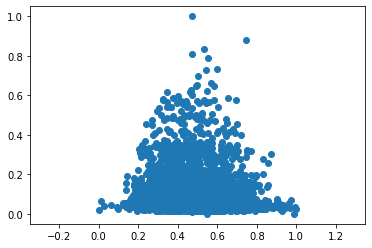

In [87]:
#ScatterPlot da tabela total. 
plt.scatter(X_ranked[:,38], X_ranked[:,1])
plt.axis('equal');

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X_ranked)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [89]:
print(pca.components_)

[[ 3.19757812e-01  1.61150353e-03  5.46023547e-03  4.43834297e-01
   7.34849858e-02 -6.73100911e-02  6.43861572e-02  2.34255329e-01
   3.71200499e-01  9.73101590e-02  1.11748209e-02  7.37003550e-02
   4.12212530e-02  4.97996777e-02  3.19885264e-02  1.84385225e-02
   8.33611138e-02  6.92513060e-02  3.19885264e-02  7.37003550e-02
  -2.79485527e-03 -7.47827233e-03 -4.43834297e-01 -6.73100911e-02
   7.34849858e-02 -6.01075048e-02 -2.38484807e-01 -3.82866719e-01
  -9.41028956e-02 -1.83531740e-02 -7.83624524e-02 -4.28390515e-02
  -5.25721322e-02 -3.75241914e-02 -2.30694093e-02 -8.33611138e-02
  -6.92513060e-02 -3.75241914e-02 -7.83624524e-02]
 [ 4.88126910e-02  1.71193901e-03  2.52264684e-03 -5.07250778e-01
  -7.53137032e-03  7.69132813e-03 -4.70476718e-03  2.22799915e-01
   4.19170207e-01  2.64296226e-02 -1.49415524e-03 -1.02988601e-02
   1.15025097e-03  2.09496936e-03 -4.94204941e-03  1.54214775e-02
  -1.18003968e-02  4.15281960e-03 -4.94204941e-03 -1.02988601e-02
  -6.40377360e-04  8.3658

In [90]:
print(pca.explained_variance_)

[0.66928775 0.42046767 0.24473635 0.19879299 0.16100982]


In [91]:
print(pca.explained_variance_ratio_)

[0.32100369 0.20166464 0.11738041 0.09534506 0.0772235 ]


In [92]:
print(pca.mean_)

[0.49903836 0.07056444 0.10462522 0.50480818 0.28108752 0.27898481
 0.22914158 0.27497722 0.36197996 0.18797449 0.01285555 0.44510489
 0.68117754 0.64572902 0.65647443 0.54901812 0.48636203 0.52595327
 0.65647443 0.44510489 0.06062205 0.11346459 0.49519182 0.27898481
 0.28108752 0.23793256 0.28656747 0.41309849 0.16003644 0.02151027
 0.45807651 0.62509304 0.63510085 0.60631443 0.53764873 0.51363797
 0.47404673 0.60631443 0.45807651]


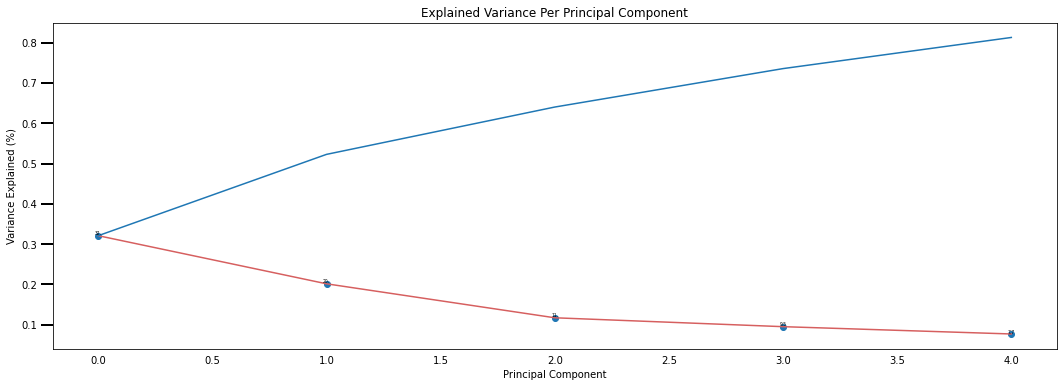

In [93]:
#Gráfico de cotovelo
scree_plot(pca)

In [94]:
features = ranked.columns
features

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [95]:
features = features[1:]
X = X_ranked[:, 1:]

pca = PCA(n_components=5)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=X_ranked[:,0])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [96]:
features = features_blueTeam
X = X_ranked[:, 1:]

pca = PCA(n_components=5)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=X_ranked[:,0])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [97]:
features = features_redTeam
X = X_ranked[:, 1:]

pca = PCA(n_components=5)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=X_ranked[:,0])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [98]:
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.33924017 0.22881781 0.11289216 0.08809775 0.06453157]

 Total Variance Explained: 83.36


#Atividade 4

## Data Cleaning (Realizar a limpeza dos doados)

####Variáveis que podem ser removidas:
* Variáveis removidas: 

    * `blueTotalGold`,`blueTotalExperience`,`blueExperienceDiff`, `blueTotalMinionsKilled` `blueCSPerMin`, `blueGoldPerMin`, `blueAvgLevel`,`blueEliteMonsters`.

    * `redFirstBlood`, `redGoldDiff`, `redExperienceDiff`, `redKills`, `redDeaths`, `redAssists`, `redTotalGold`, `redTotalExperience`, `redTotalMinionsKilled`, `redCSPerMin`, `redGoldPerMin`, `redAvgLevel`, `redAvgLevel`, `redEliteMonsters`.



In [99]:
nranked = ranked
nranked.drop(columns=['blueTotalGold', 'blueTotalExperience','blueExperienceDiff', 'blueTotalMinionsKilled', 'blueCSPerMin', 'blueGoldPerMin', 'blueAvgLevel','blueEliteMonsters'], inplace=True)
nranked.drop(columns=['redFirstBlood', 'redGoldDiff', 'redExperienceDiff', 'redKills', 'redDeaths', 'redAssists', 'redTotalGold', 
                    'redTotalExperience', 'redTotalMinionsKilled', 'redGoldPerMin', 'redAvgLevel', 'redCSPerMin','redEliteMonsters'], inplace=True)

In [100]:
nranked.head(10)

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   
2         0               15                   0               0          7   
3         0               43                   1               0          4   
4         0               75                   4               0          6   
5         1               18                   0               0          5   
6         1               18                   3               1          7   
7         0               16                   2               0          5   
8         0               16                   3               0          7   
9         1               13                   1               1          4   

   blueDeaths  blueAssists  blueDragons  blueHeralds  blueTowersDestroyed  \
0           6           11            0            0                    0   
1           5            5            0            0                    0   
2          11            4            1            0                    0   
3           5            5            0            1                    0   
4           6            6            0            0                    0   
5           3            6            1            0                    0   
6           6            7            1            0                    0   
7          13            3            0            0                    0   
8           7            8            0            0                    0   
9           5            5            1            0                    0   

   blueTotalJungleMinionsKilled  blueGoldDiff  redWardsPlaced  \
0                            36           643              15   
1                            43         -2908              12   
2                            46         -1172              15   
3                            55         -1321              15   
4                            57         -1004              17   
5                            42           698              36   
6                            53          2411              57   
7                            48         -2615              15   
8                            61         -1979              15   
9                            39         -1548              16   

   redWardsDestroyed  redDragons  redHeralds  redTowersDestroyed  \
0                  6           0           0                   0   
1                  1           1           1                   1   
2                  3           0           0                   0   
3                  2           0           0                   0   
4                  2           1           0                   0   
5                  5           0           0                   0   
6                  1           0           0                   0   
7                  0           1           0                   0   
8                  2           1           1                   0   
9                  2           0           0                   0   

   redTotalJungleMinionsKilled  
0                           55  
1                           52  
2                           28  
3                           47  
4                           67  
5                           59  
6                           35  
7                           54  
8                           53  
9                           43

In [101]:
X_ranked = nranked
X_ranked.head(15)

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0          0               28                   2               1          9   
1          0               12                   1               0          5   
2          0               15                   0               0          7   
3          0               43                   1               0          4   
4          0               75                   4               0          6   
5          1               18                   0               0          5   
6          1               18                   3               1          7   
7          0               16                   2               0          5   
8          0               16                   3               0          7   
9          1               13                   1               1          4   
10         0               20                   3               1          4   
11         0               33                   2               1         11   
12         1               18                   1               1          7   
13         0               14                   3               0          4   
14         1               15                   3               1          4   

    blueDeaths  blueAssists  blueDragons  blueHeralds  blueTowersDestroyed  \
0            6           11            0            0                    0   
1            5            5            0            0                    0   
2           11            4            1            0                    0   
3            5            5            0            1                    0   
4            6            6            0            0                    0   
5            3            6            1            0                    0   
6            6            7            1            0                    0   
7           13            3            0            0                    0   
8            7            8            0            0                    0   
9            5            5            1            0                    0   
10           4            6            0            0                    0   
11          11            7            0            1                    0   
12           1           11            1            0                    0   
13           9            1            0            1                    0   
14           4            4            0            0                    0   

    blueTotalJungleMinionsKilled  blueGoldDiff  redWardsPlaced  \
0                             36           643              15   
1                             43         -2908              12   
2                             46         -1172              15   
3                             55         -1321              15   
4                             57         -1004              17   
5                             42           698              36   
6                             53          2411              57   
7                             48         -2615              15   
8                             61         -1979              15   
9                             39         -1548              16   
10                            28           331              15   
11                            40         -1505              17   
12                            53          3274              12   
13                            52         -3414              20   
14                            51          -470             102   

    redWardsDestroyed  redDragons  redHeralds  redTowersDestroyed  \
0                   6           0           0                   0   
1                   1           1           1                   1   
2                   3           0           0                   0   
3                   2           0           0                   0   
4                   2           1           0                   0   
5  

In [102]:
#Normalização MinMax
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ranked = scaler.fit_transform(X_ranked)
X_ranked

array([[0.        , 0.09387755, 0.07407407, ..., 0.        , 0.        ,
        0.57954545],
       [0.        , 0.02857143, 0.03703704, ..., 1.        , 0.5       ,
        0.54545455],
       [0.        , 0.04081633, 0.        , ..., 0.        , 0.        ,
        0.27272727],
       ...,
       [0.        , 0.07346939, 0.03703704, ..., 0.        , 0.        ,
        0.63636364],
       [0.        , 0.03673469, 0.14814815, ..., 0.        , 0.        ,
        0.40909091],
       [1.        , 0.05306122, 0.        , ..., 0.        , 0.        ,
        0.47727273]])

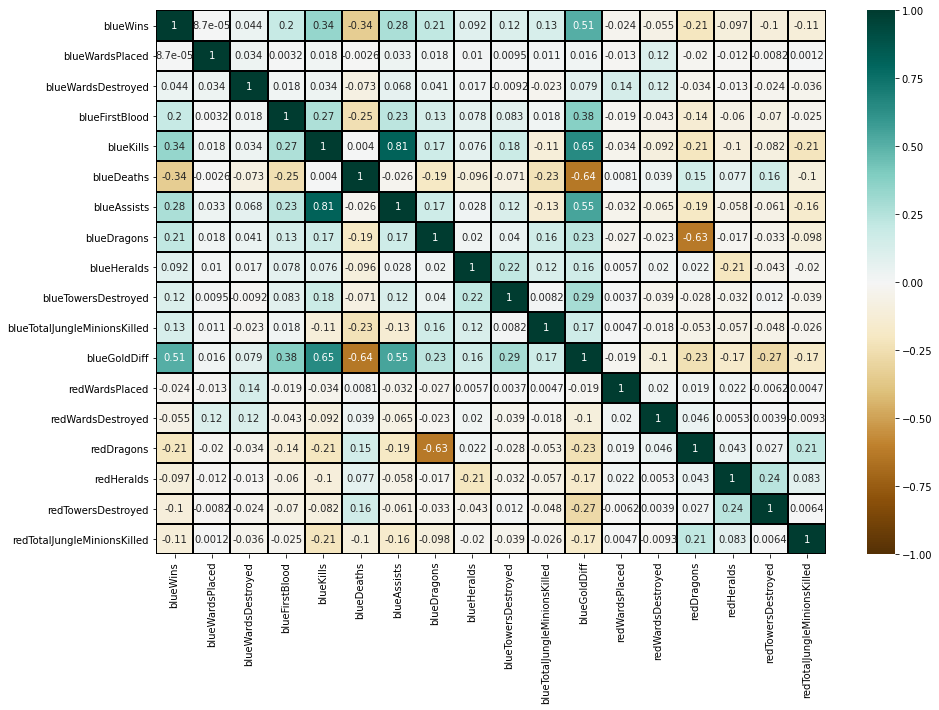

In [103]:
# Novo Mapa de Calor
plt.figure(figsize=(15, 10))
sns.heatmap(nranked.corr(), 
           xticklabels=ranked.corr().columns.values,
           yticklabels=ranked.corr().columns.values,
           vmin=-1, vmax=1, center= 0, cmap='BrBG', annot = True,
           linewidths=1, linecolor='black'          
           )

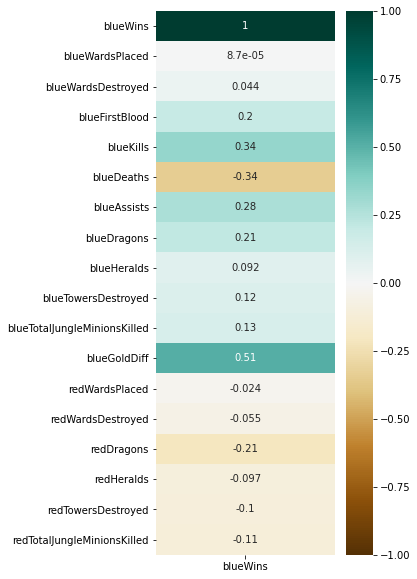

In [104]:
# Correlação com a vitória
fig = plt.figure(figsize=(4, 10))
sns.heatmap(nranked.corr()[['blueWins']],vmin=-1, vmax=1, center= 0, cmap='BrBG', annot=True)

In [105]:
from collections import Counter
counter = Counter(nranked['blueWins'])
print(counter) 

Counter({0: 4949, 1: 4930})


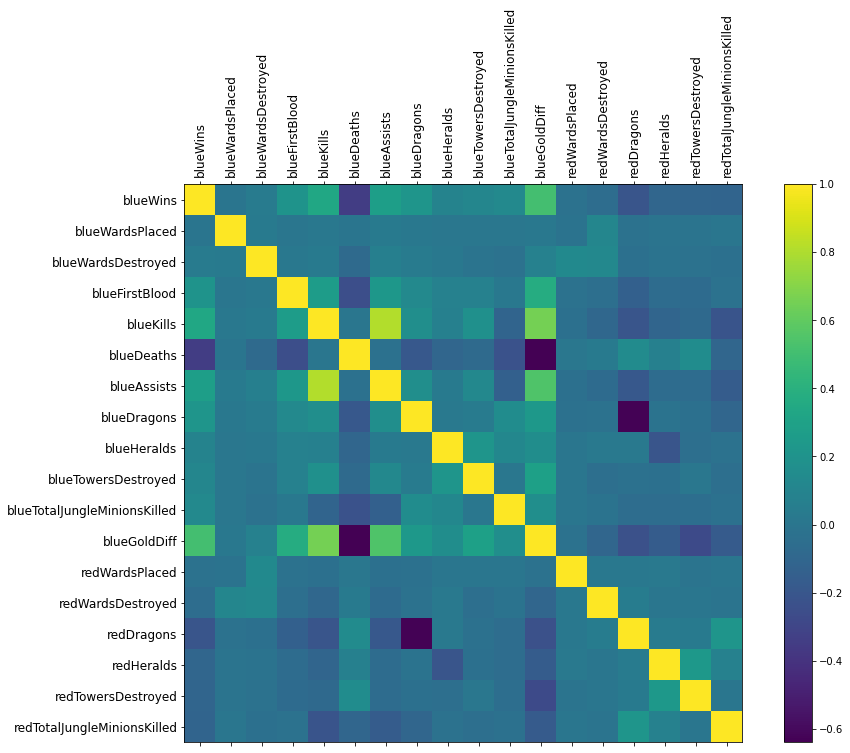

In [106]:
# Nova Matriz de correlação
f = plt.figure(figsize=(15, 10))
plt.matshow(nranked.corr(),fignum=f.number)
continuous_features = nranked.describe().columns
plt.xticks(range(nranked.select_dtypes(['number']).shape[1]), ranked.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(nranked.select_dtypes(['number']).shape[1]), ranked.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()

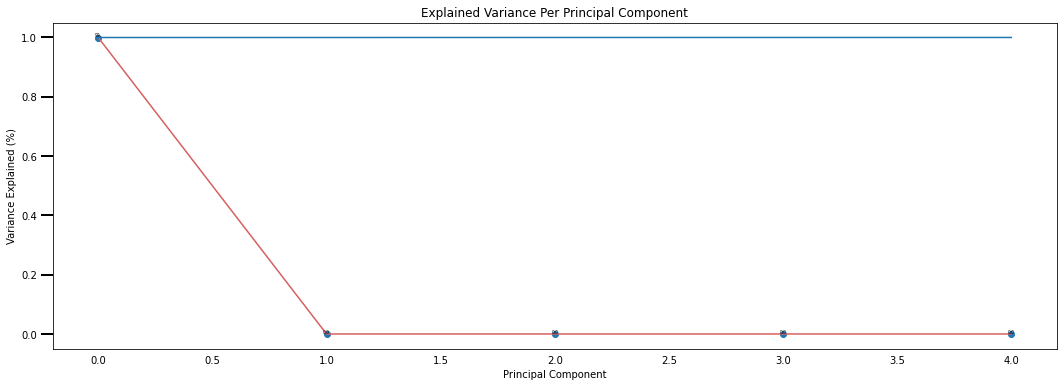

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(nranked)
scree_plot(pca)

In [108]:
print(pca.explained_variance_)

[6.01894074e+06 3.41687803e+02 3.23681161e+02 9.88282765e+01
 9.63470988e+01]


In [109]:
print(pca.explained_variance_ratio_)

[9.99852119e-01 5.67603651e-05 5.37691444e-05 1.64171182e-05
 1.60049509e-05]


In [110]:
#nranked_columns = nranked.describe().columns
#features = nranked[nranked_columns].columns
#features[1:]

In [111]:
features = nranked.columns.difference(['blueWins'])
print(features)

Index(['blueAssists', 'blueDeaths', 'blueDragons', 'blueFirstBlood',
       'blueGoldDiff', 'blueHeralds', 'blueKills',
       'blueTotalJungleMinionsKilled', 'blueTowersDestroyed',
       'blueWardsDestroyed', 'blueWardsPlaced', 'redDragons', 'redHeralds',
       'redTotalJungleMinionsKilled', 'redTowersDestroyed',
       'redWardsDestroyed', 'redWardsPlaced'],
      dtype='object')


In [112]:
# import seaborn as sns
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
#ranked = sns.load_dataset('ranked')

#titanic['female'] = titanic['sex'].map({'male': 0, 'female': 1})
#titanic.dropna(subset=feature_names, inplace=True)  #891 para 714

X = nranked[features].to_numpy()
y = nranked['blueWins'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=None)

In [113]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 5,
                             min_samples_split=20,
                             random_state=None)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [114]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 7,
                             min_samples_split=20,
                             random_state=None)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [115]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = clf.predict(X_train)
y_test_true = y_test
y_test_pred = clf.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.73

 ---------------------------

Acurácia de Teste: 0.73


In [116]:
y_train_true = y_train
y_train_pred = clf_entropy.predict(X_train)
y_test_true = y_test
y_test_pred = clf_entropy.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.75

 ---------------------------

Acurácia de Teste: 0.72


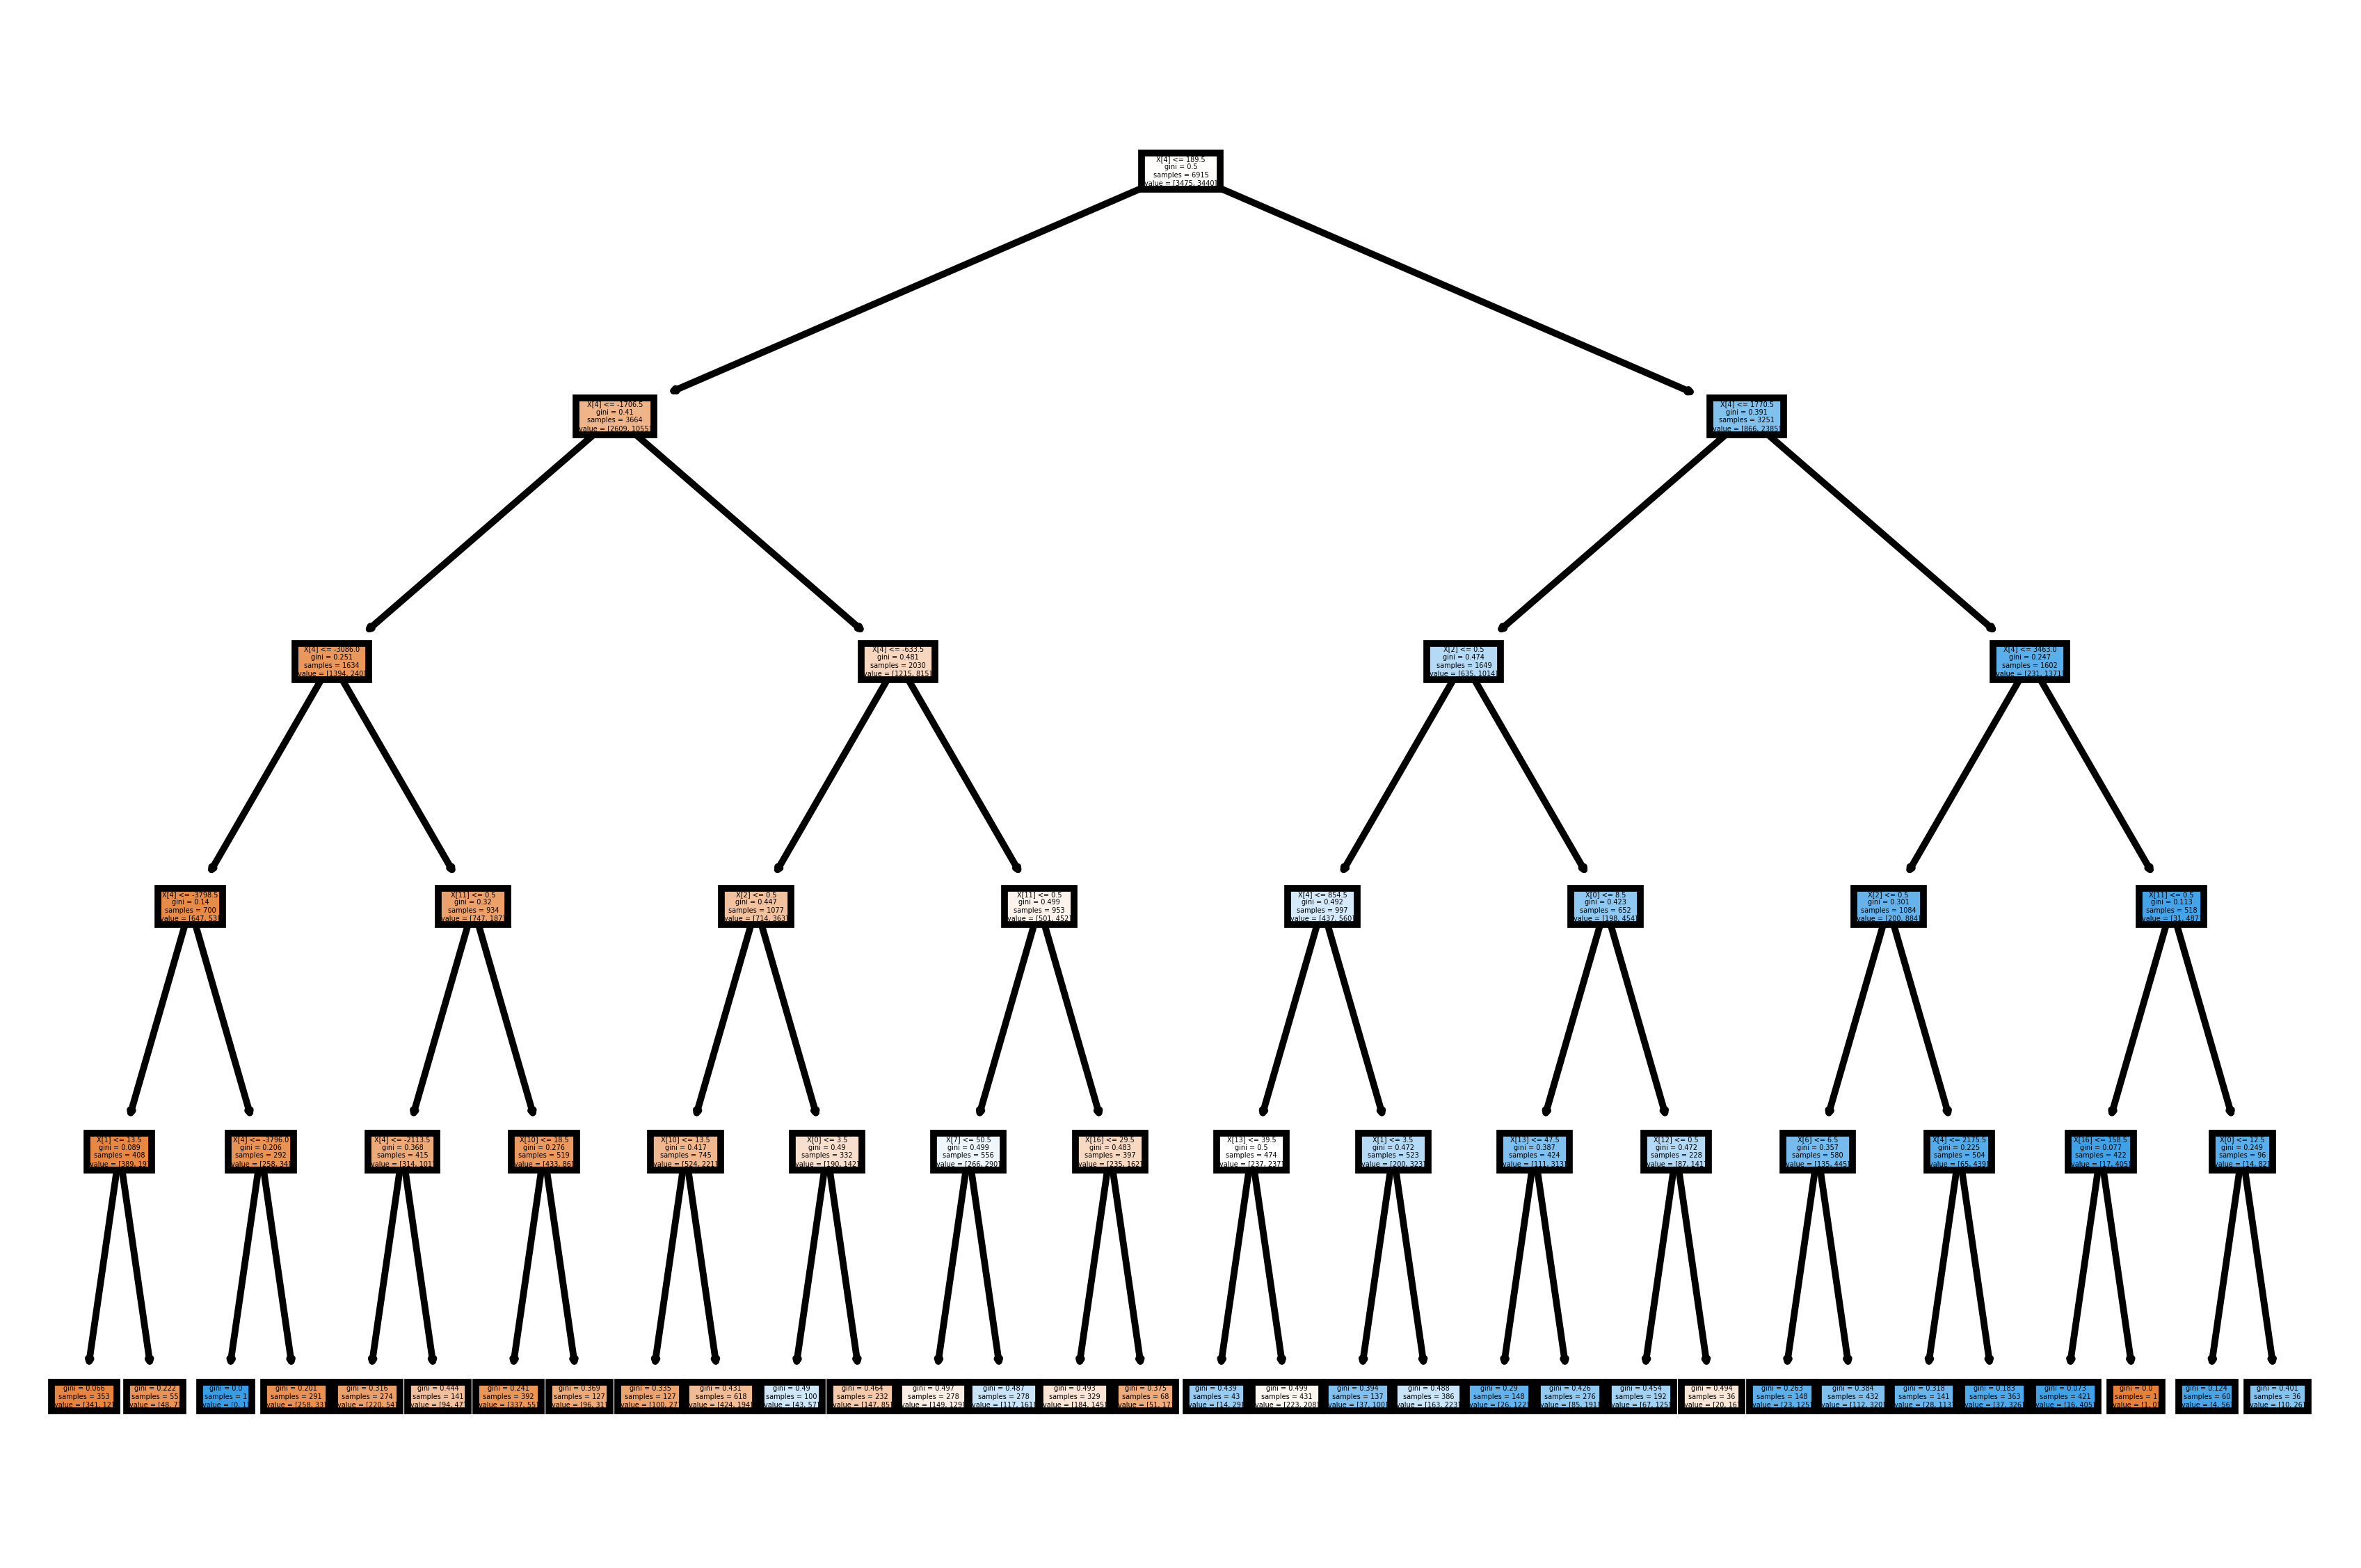

In [117]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 700
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf, filled=True)
plt.show()

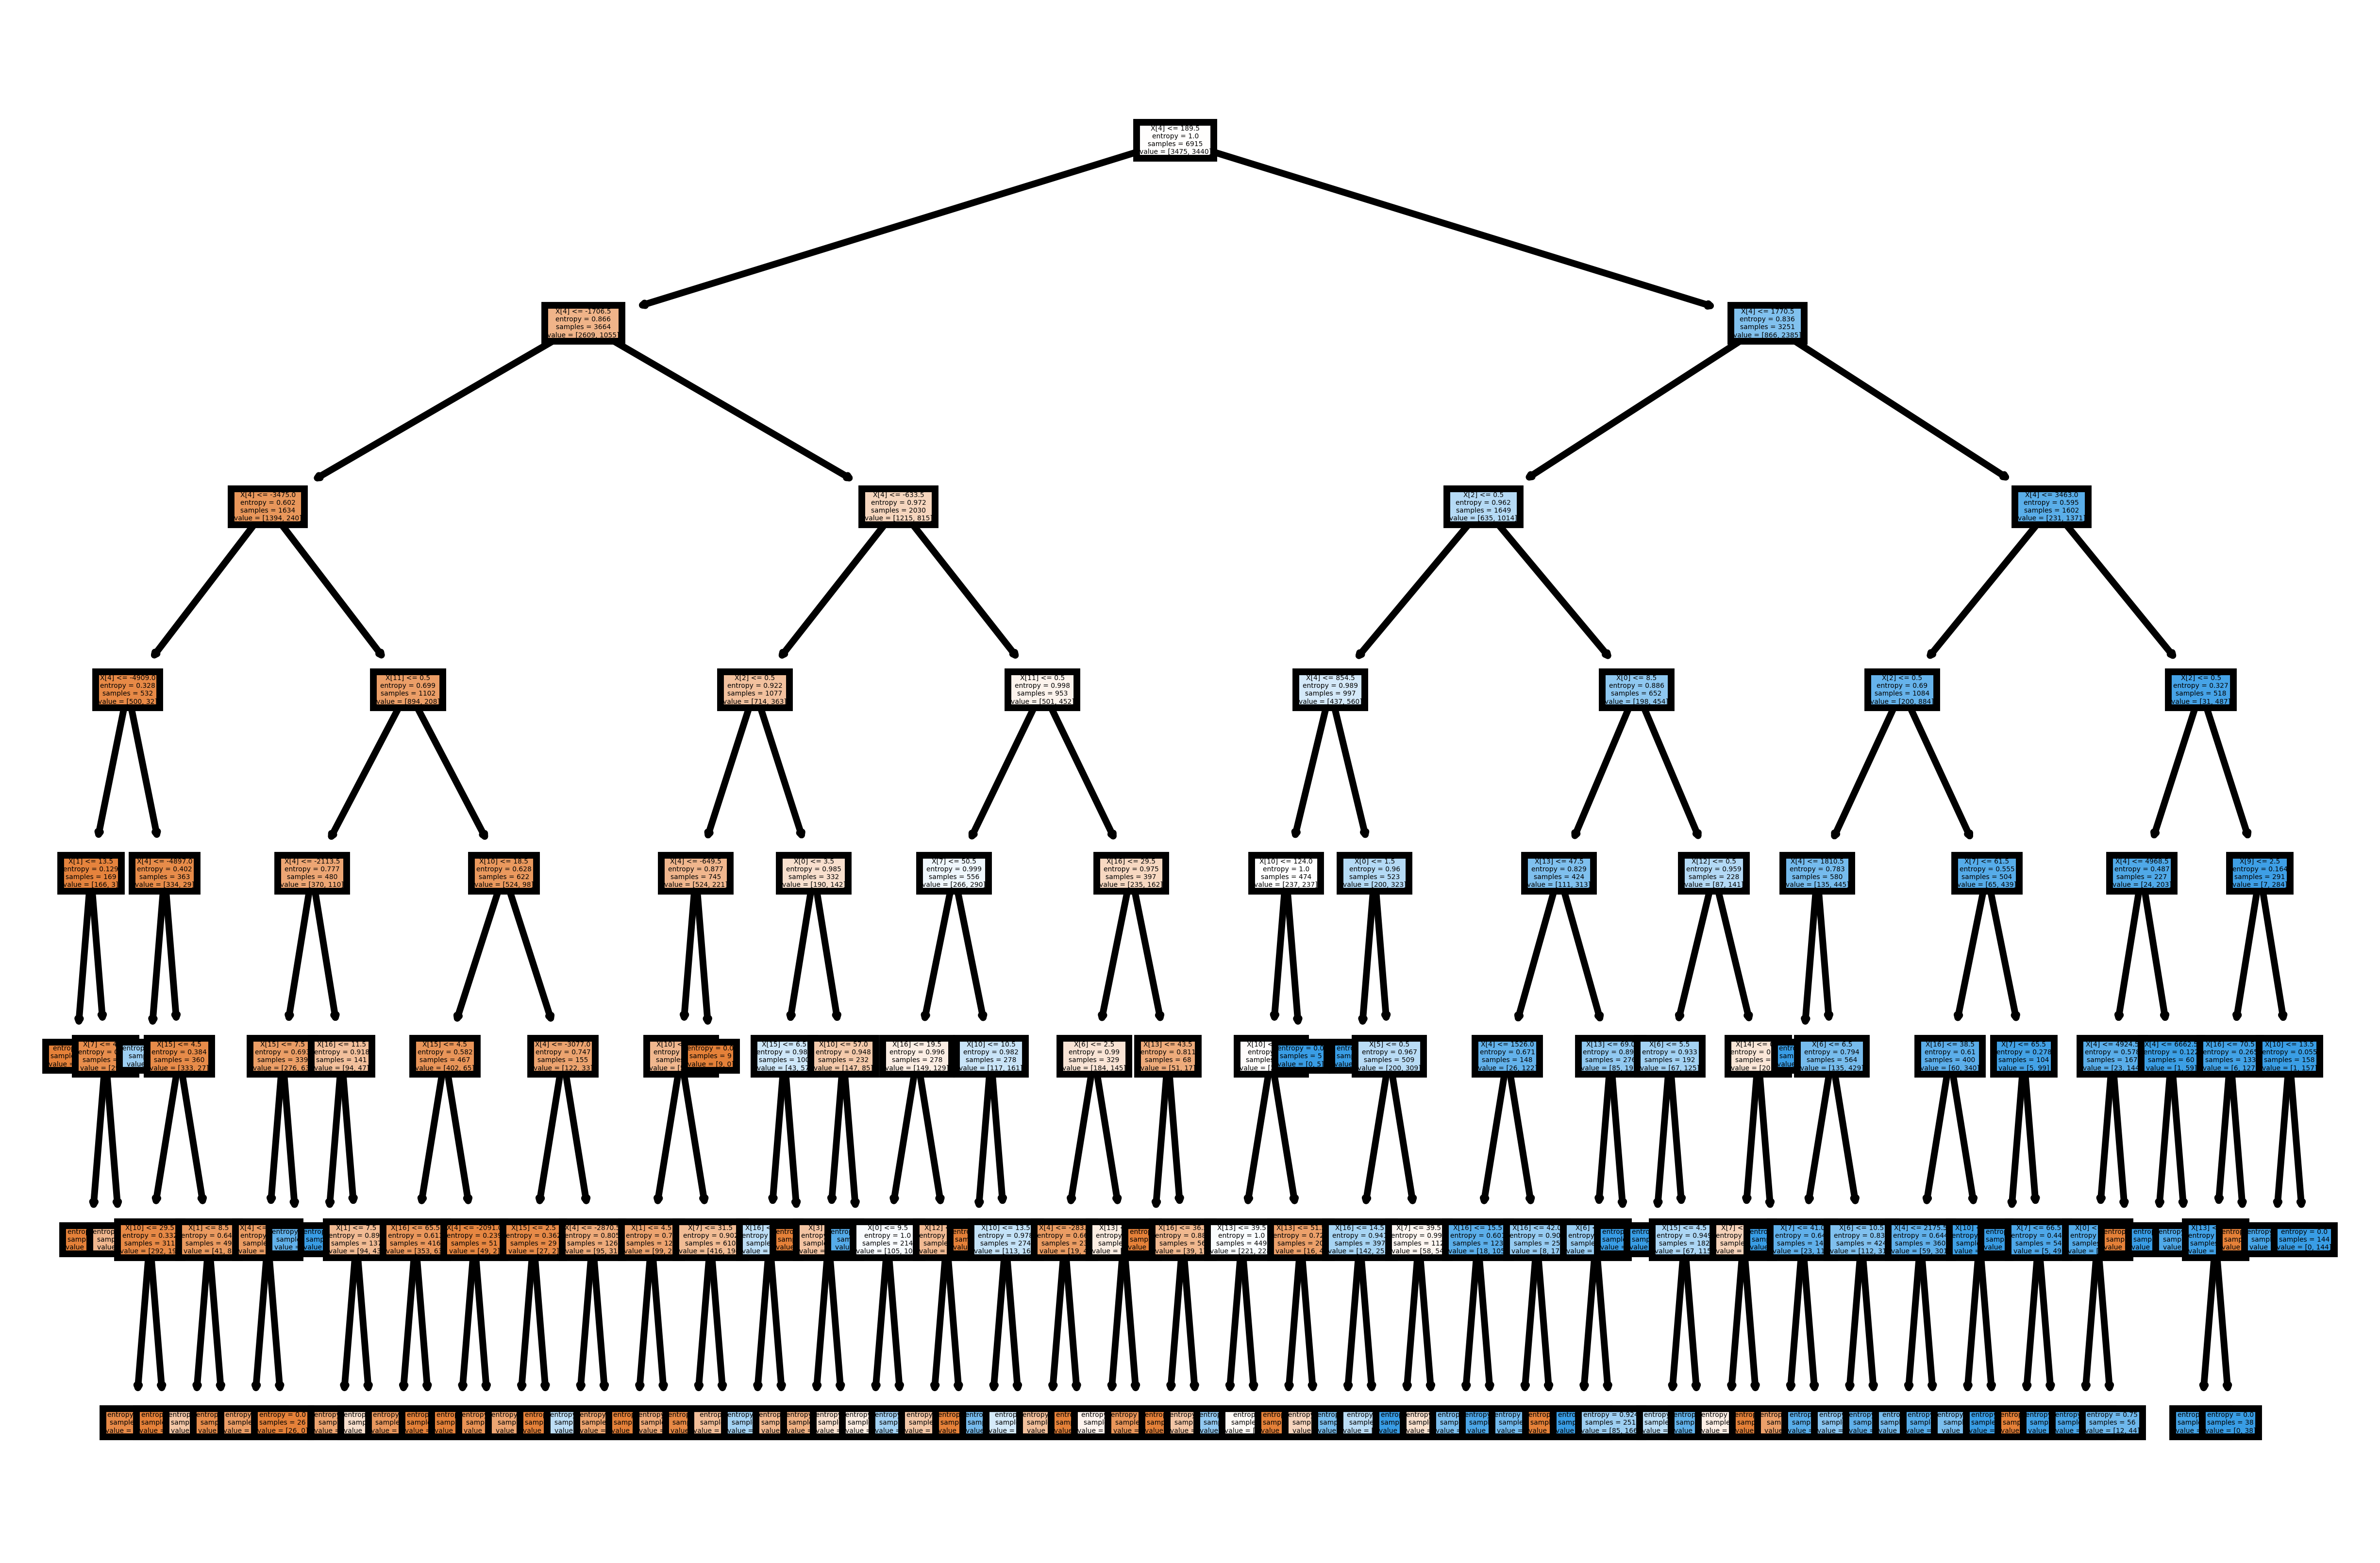

In [118]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1000
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure()
plot_tree(clf_entropy, filled=True)
plt.show()

In [119]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (6915, 17)
Tamanho de X_test:  (2964, 17)
Tamanho de y_train:  (6915,)
Tamanho de y_test:  (2964,)


# Atividade 5

###Classificador SVM

In [120]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

73.11


In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

print("Matrix de Confusão:")
nranked = confusion_matrix( y_test_true, y_test_pred)
print(nranked)

Acurácia de Teste: 0.72
Matrix de Confusão:
[[1125  349]
 [ 489 1001]]


In [122]:
from collections import Counter
counter = Counter(y)
print(counter) 

Counter({0: 4949, 1: 4930})


###Classificação com KNN

In [123]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (6915, 17)
Tamanho de X_test:  (2964, 17)
Tamanho de y_train:  (6915,)
Tamanho de y_test:  (2964,)


In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [125]:
from sklearn.metrics import accuracy_score

y_train_true = y_train
y_train_pred = knn.predict(X_train)
y_test_true = y_test
y_test_pred = knn.predict(X_test)


print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred), 2)}")
print('\n ---------------------------\n')
print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

Acurácia de Treino: 0.77

 ---------------------------

Acurácia de Teste: 0.68


In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

print("Matrix de Confusão:")
nranked = confusion_matrix( y_test_true, y_test_pred)
print(nranked)

Acurácia de Teste: 0.68
Matrix de Confusão:
[[1019  455]
 [ 483 1007]]


## Separa

In [128]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

print(f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred), 2)}")

print("Matrix de Confusão:")
nranked = confusion_matrix( y_test_true, y_test_pred)
print(nranked)

Acurácia de Teste: 0.68
Matrix de Confusão:
[[1019  455]
 [ 483 1007]]


In [129]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_true , y_test_pred )
recall_score(y_test_true , y_test_pred )
f1_score( y_test_true , y_test_pred )

0.6822493224932249